# project : Ocular Disease Recognition

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China.

Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

# Importing the Dependencies.

In [4]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import json
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

# Data collection & Data processing

In [ ]:
Ocular_df=pd.read_csv("./full_df.csv")

In [ ]:
Ocular_df.shape

# Data cleaning

Data cleaning, also known as data cleansing or data scrubbing, is the process of identifying and correcting errors or inconsistencies in datasets. It is a crucial step in the data preparation phase of the data analysis process. The main goal of data cleaning is to improve the quality of data, ensuring that it is accurate, complete, and reliable for analysis.

In [ ]:
# First fifth rows of DATA
Ocular_df.head()

In [ ]:
#Information of DATA
Ocular_df.info()

In [ ]:
Ocular_df.head(10).info

In [ ]:
# dimensions of DATA
Ocular_df.shape

In [8]:
# drop Columns ()
Ocular_df.drop("filepath" ,  axis=1, inplace=True )
Ocular_df.drop("filename" ,  axis=1, inplace=True )

In [9]:
#print Columns after removing the two columns
print(Ocular_df.columns.tolist())

['ID', 'Patient_Age', 'Patient_Sex', 'Left_Fundus', 'Right_Fundus', 'Left_Diagnostic_Keywords', 'Right_Diagnostic_Keywords', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels', 'target']


In [10]:
#Data describetion
Ocular_df.describe()

,ID,Patient_Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Use round() function to round off all columns in the dataframe to 3 decimal places
Ocular_df.describe().round()

,ID,Patient_Age,N,D,G,C,A,H,M,O
count,6392.0,6392.0,6392.0,6392.0,6392.0,6392.0,6392.0,6392.0,6392.0,6392.0
mean,2271.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1418.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,921.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2420.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3294.0,66.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4784.0,91.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
# check Rows Duplication
Ocular_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6387     True
6388     True
6389    False
6390     True
6391     True
Length: 6392, dtype: bool

In [13]:
# Num of Rows Duplication
Ocular_df.duplicated().sum()

2146

#There is no rows contains noisy data 

In [14]:
#Check the nullity
Ocular_df.isnull().sum()

ID                           0
Patient_Age                  0
Patient_Sex                  0
Left_Fundus                  0
Right_Fundus                 0
Left_Diagnostic_Keywords     0
Right_Diagnostic_Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
labels                       0
target                       0
dtype: int64

In [15]:
Ocular_df.value_counts()

ID    Patient_Age  Patient_Sex  Left_Fundus    Right_Fundus    Left_Diagnostic_Keywords   Right_Diagnostic_Keywords  N  D  G  C  A  H  M  O  labels  target                  
2110  70           Female       2110_left.jpg  2110_right.jpg  cataract                   cataract                   0  0  0  1  0  0  0  0  ['C']   [0, 0, 0, 1, 0, 0, 0, 0]    2
2645  51           Female       2645_left.jpg  2645_right.jpg  normal fundus              normal fundus              1  0  0  0  0  0  0  0  ['N']   [1, 0, 0, 0, 0, 0, 0, 0]    2
2678  67           Female       2678_left.jpg  2678_right.jpg  normal fundus              normal fundus              1  0  0  0  0  0  0  0  ['N']   [1, 0, 0, 0, 0, 0, 0, 0]    2
2679  51           Female       2679_left.jpg  2679_right.jpg  normal fundus              normal fundus              1  0  0  0  0  0  0  0  ['N']   [1, 0, 0, 0, 0, 0, 0, 0]    2
2680  51           Female       2680_left.jpg  2680_right.jpg  normal fundus              normal fundus       

# Data Visualization

Data visualization is the graphical representation of data to help people understand the significance of the information. It involves converting raw data into a visual format, such as charts, graphs, and maps, to make patterns, trends, and insights more apparent. Effective data visualization can simplify complex datasets, making it easier for individuals to comprehend and analyze the information.

Question 1: Represent the relationship between Normal patients & Diabetes patients

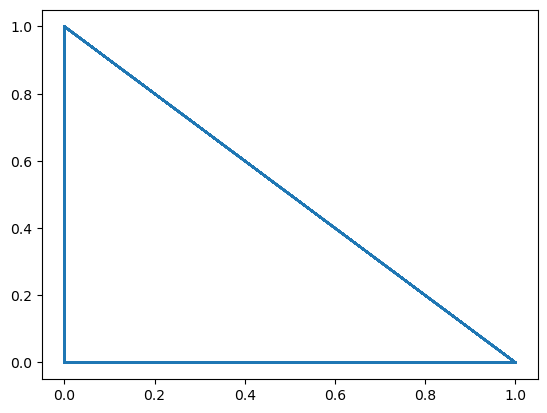

In [16]:
plt.plot(Ocular_df.N, Ocular_df.D)

In [17]:
Ocular_df

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,N,D,G,C,A,H,M,O,labels,target
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"


In [18]:
Ocular_df.columns


Index(['ID', 'Patient_Age', 'Patient_Sex', 'Left_Fundus', 'Right_Fundus',
       'Left_Diagnostic_Keywords', 'Right_Diagnostic_Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'labels', 'target'],
      dtype='object')

Question 2: Represent relationship between Patient Age and Patient Sex

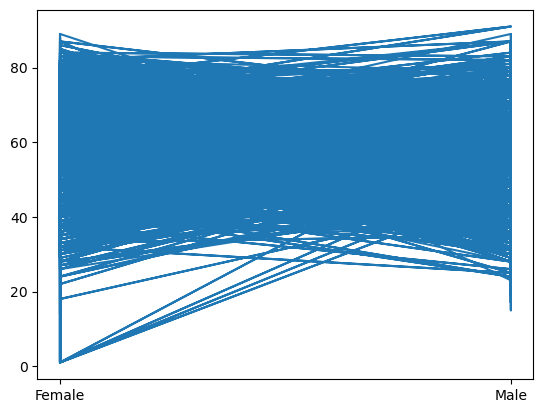

In [19]:
plt.plot(Ocular_df.Patient_Sex, Ocular_df.Patient_Age)


Question 3: Information about Right-Diagnostic Keywords

In [20]:
Ocular_df['Right_Diagnostic_Keywords']

0                                           normal fundus
1                                           normal fundus
2                  moderate non proliferative retinopathy
3                       mild nonproliferative retinopathy
4                  moderate non proliferative retinopathy
                              ...                        
6387                   proliferative diabetic retinopathy
6388               moderate non proliferative retinopathy
6389                                        normal fundus
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Right_Diagnostic_Keywords, Length: 6392, dtype: object

In [21]:
Ocular_df.Right_Diagnostic_Keywords.unique()

array(['normal fundus', 'moderate non proliferative retinopathy',
       'mild nonproliferative retinopathy',
       'moderate non proliferative retinopathy，epiretinal membrane',
       'vitreous degeneration',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'macular epiretinal membrane',
       'myelinated nerve fibers', 'drusen', 'epiretinal membrane',
       'hypertensive retinopathy', 'cataract',
       'moderate non proliferative retinopathy，abnormal pigment ',
       'macular epiretinal membrane，moderate non proliferative retinopathy',
       'dry age-related macular degeneration，glaucoma',
       'dry age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'epiretinal membrane over the macula',
       'moderate non proliferative retinopathy，pathological myopia',
       'macular epiretinal membrane，diabetic retinopathy',
       'diabetic retinopathy',
       'wet age-related macu

<Axes: >

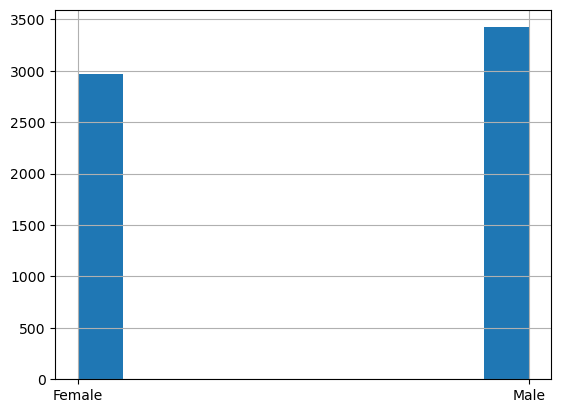

In [22]:
Ocular_df.Patient_Sex.hist()

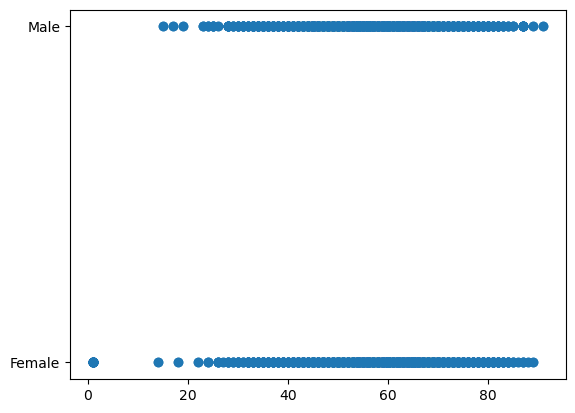

In [23]:
plt.scatter(Ocular_df.Patient_Age, Ocular_df.Patient_Sex)

<Axes: ylabel='Patient_Sex'>

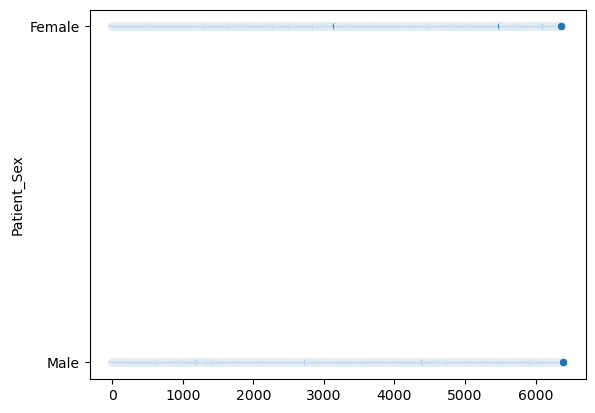

In [24]:
sns.scatterplot(Ocular_df.Patient_Sex)

Question 4: Represent the target column

<Axes: ylabel='target'>

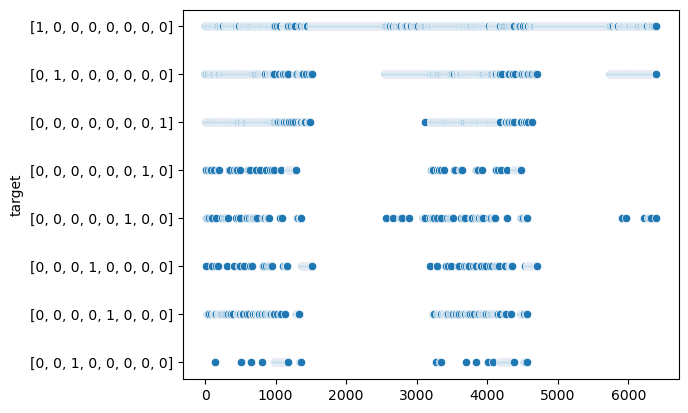

In [25]:
sns.scatterplot(Ocular_df.target)

<Axes: xlabel='Patient_Age', ylabel='Patient_Sex'>

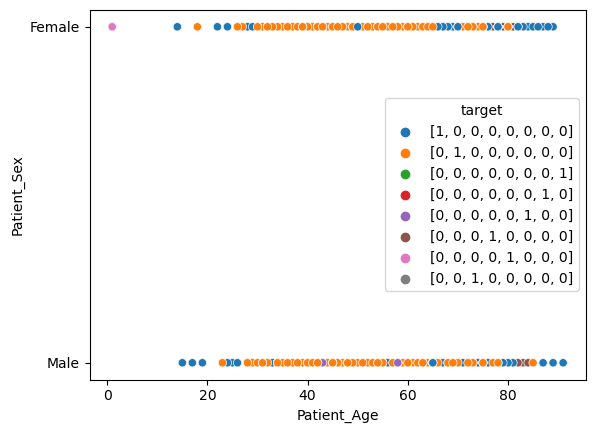

In [26]:
sns.scatterplot(data=Ocular_df, x="Patient_Age", y="Patient_Sex", hue=Ocular_df.target)

In [27]:
Ocular_df.describe()

,ID,Patient_Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
Ocular_df.Patient_Age.describe()

count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient_Age, dtype: float64

(array([  28.,    8.,   29.,  223.,  589., 1378., 2057., 1511.,  486.,
          83.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <BarContainer object of 10 artists>)

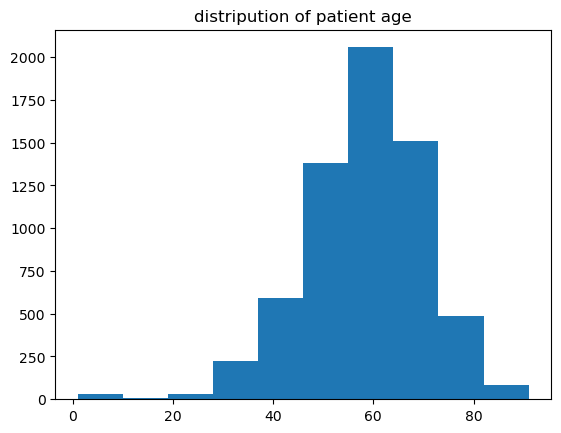

In [29]:
plt.title("distripution of patient age")
plt.hist(Ocular_df.Patient_Age)

(array([ 119.,  165.,  330.,  654., 1113.]),
 array([30., 35., 40., 45., 50., 55.]),
 <BarContainer object of 5 artists>)

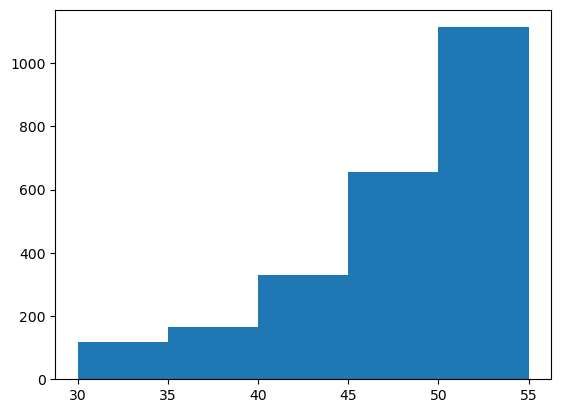

In [30]:
plt.hist(Ocular_df.Patient_Age, bins=np.arange(30,60,5))

In [31]:
normal_fundus_left=Ocular_df[Ocular_df.Left_Diagnostic_Keywords=='normal fundus']

In [32]:
normal_fundus_left

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,N,D,G,C,A,H,M,O,labels,target
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]"
12,14,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]"
13,15,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers,0,0,0,0,0,0,0,1,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,4637,45,Male,4637_left.jpg,4637_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
6358,4639,60,Female,4639_left.jpg,4639_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
6360,4641,56,Male,4641_left.jpg,4641_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
6378,4672,65,Male,4672_left.jpg,4672_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"


In [33]:
normal_fundus_right=Ocular_df[Ocular_df.Right_Diagnostic_Keywords=='normal fundus']

In [34]:
normal_fundus_right

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,N,D,G,C,A,H,M,O,labels,target
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
24,29,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,4642,52,Male,4642_left.jpg,4642_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6363,4644,60,Female,4644_left.jpg,4644_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6373,4660,51,Male,4660_left.jpg,4660_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
6377,4671,48,Male,4671_left.jpg,4671_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"


(array([1207.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1498.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

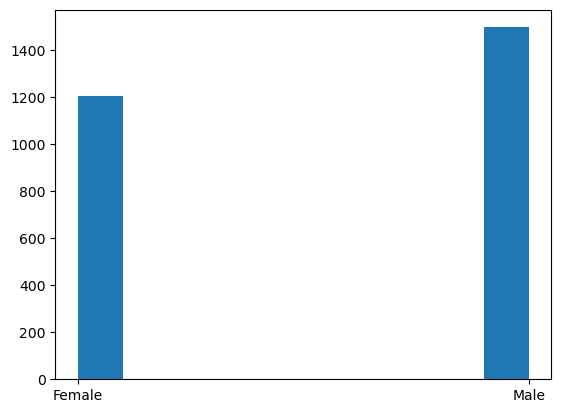

In [35]:
plt.hist(normal_fundus_right.Patient_Sex)

In [36]:
classes = { 0: "Normal",
            1: "Diabetes",
            2: "Glaucoma",
            3: "Cataract",
            4: "Age related Macular Degeneration",
            5: "Hypertension",
            6: "Pathological Myopia",
            7: "Other diseases/abnormalities"
          }

In [37]:
raw_data = Ocular_df.drop(columns=['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels'])

raw_data.head()

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,target
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [38]:
targets = np.array(raw_data["target"].apply(lambda x: json.loads(x)).tolist())
targets.shape

(6392, 8)

Question 6: What is the size of classes in dataset?

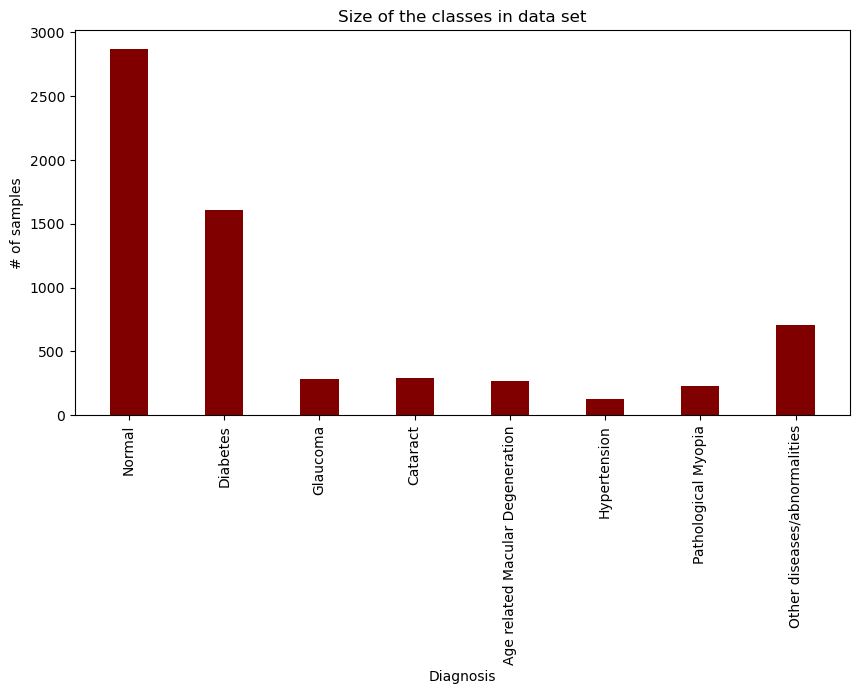

In [39]:
data = np.sum(targets, axis=0)

classes_names = list(classes.values())
values = list(data)
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(classes_names, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Diagnosis")
plt.ylabel("# of samples")
plt.title("Size of the classes in data set")

plt.xticks(rotation=90)
plt.show()

Question 7: The mean of Patient Age

In [40]:
ocular=Ocular_df.groupby('labels')[['Patient_Age']].mean()

In [41]:
ocular

,Patient_Age
labels,
['A'],61.210526
['C'],66.764505
['D'],55.699627
['G'],63.021127
['H'],57.046875
['M'],54.887931
['N'],57.181692
['O'],59.607345


<Axes: xlabel='labels', ylabel='Patient_Age'>

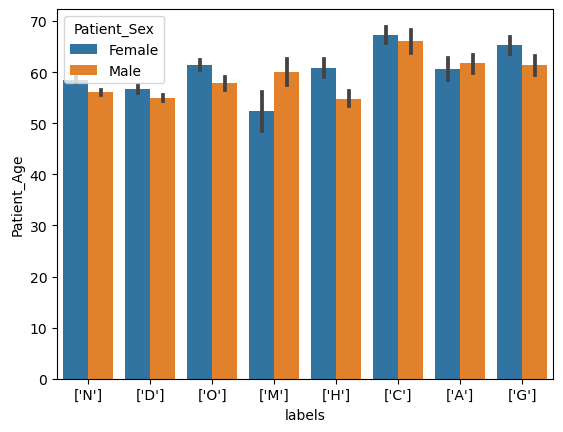

In [42]:
sns.barplot(data=Ocular_df,hue='Patient_Sex', x='labels',y='Patient_Age' )

<Axes: xlabel='labels', ylabel='Patient_Age'>

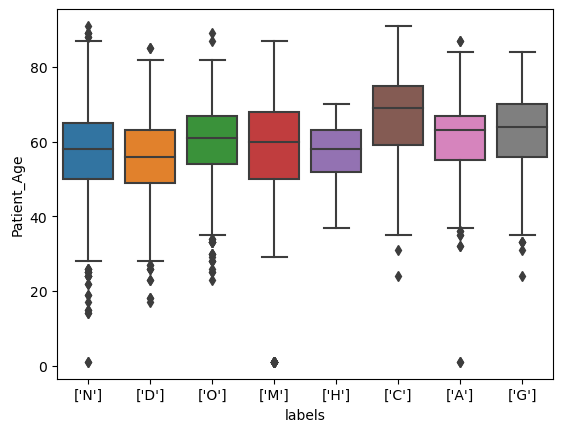

In [43]:
sns.boxplot(data=Ocular_df, x='labels',y='Patient_Age')

# Machine learning Model

##### importing libraries  and defining modules for image classification processing

In [46]:
# Import libraries
import json
import os
import pickle
import random
import time

# Ignore warnings
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from skimage import io, transform
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch dataset
from torchvision import datasets, models, transforms, utils
from torchvision.utils import make_grid

warnings.filterwarnings("ignore")

plt.ion()  # interactive mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

'2.1.2+cpu'

In [49]:
df = pd.read_csv("./full_df.csv")

df.head(10)

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


### defining special classes 

In [ ]:
raw_data = df.drop(columns=['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O', 'labels'])

raw_data.head()

In [51]:
raw_data["target"].unique().size

8

In [52]:
raw_data.shape

(6392, 10)

In [53]:
targets = np.array(raw_data["target"].apply(lambda x: json.loads(x)).tolist())
targets.shape

(6392, 8)

#### importing preprocessed_images to modify

In [63]:
img_dir = "./preprocessed_images"

In [64]:
raw_data["class_name"] = np.argmax(targets, axis=1).tolist()
raw_data["class_name"] = raw_data["class_name"] .replace(classes)

raw_data.head()

,ID,Patient_Age,Patient_Sex,Left_Fundus,Right_Fundus,Left_Diagnostic_Keywords,Right_Diagnostic_Keywords,filepath,target,filename,class_name
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,Normal
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,../input/ocular-disease-recognition-odir5k/ODI...,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,Diabetes
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,Diabetes
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,../input/ocular-disease-recognition-odir5k/ODI...,"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,Diabetes


C:\Users\norah\AppData\Local\Temp\ipykernel_20460\530337363.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\norah\AppData\Local\Temp\ipykernel_20460\530337363.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 4, 4 * i + j + 1)


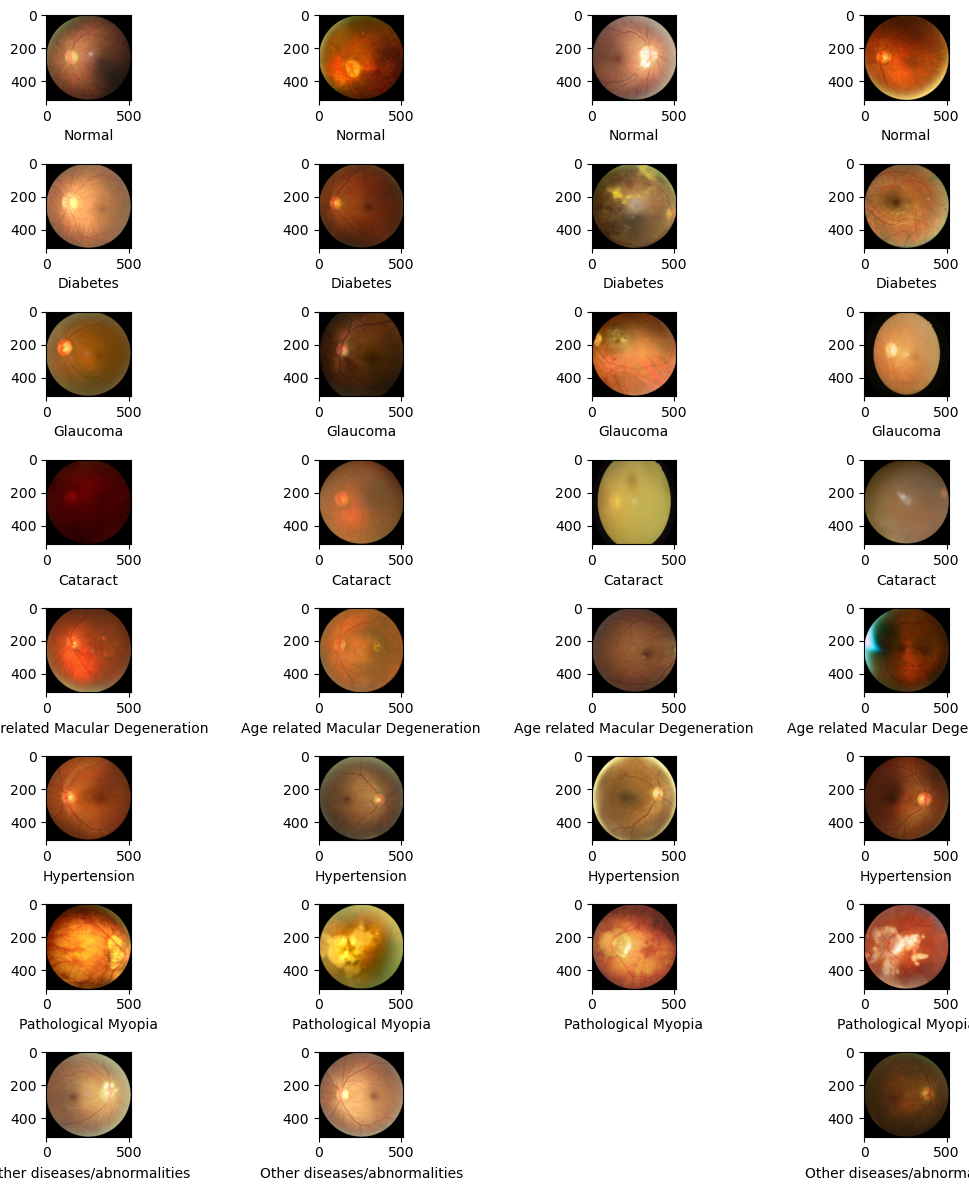

In [65]:

plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes.values()):
    
    class_subset = raw_data.loc[raw_data.class_name == class_name].sample(n=4)
    
    img_names = class_subset.filename.to_list()
    
    for j, img in enumerate(img_names):
        image = cv2.imread(os.path.join(img_dir, img))
        
        ## convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
        plt.subplot(8, 4, 4 * i + j + 1)
        plt.imshow(image_rgb, aspect=1)
        
        ## label with filename and diagnosis
        plt.xlabel('{}'.format(class_name))

        plt.tight_layout() 

C:\Users\norah\AppData\Local\Temp\ipykernel_20460\3521303255.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\norah\AppData\Local\Temp\ipykernel_20460\3521303255.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 4, 4 * i + j + 1)


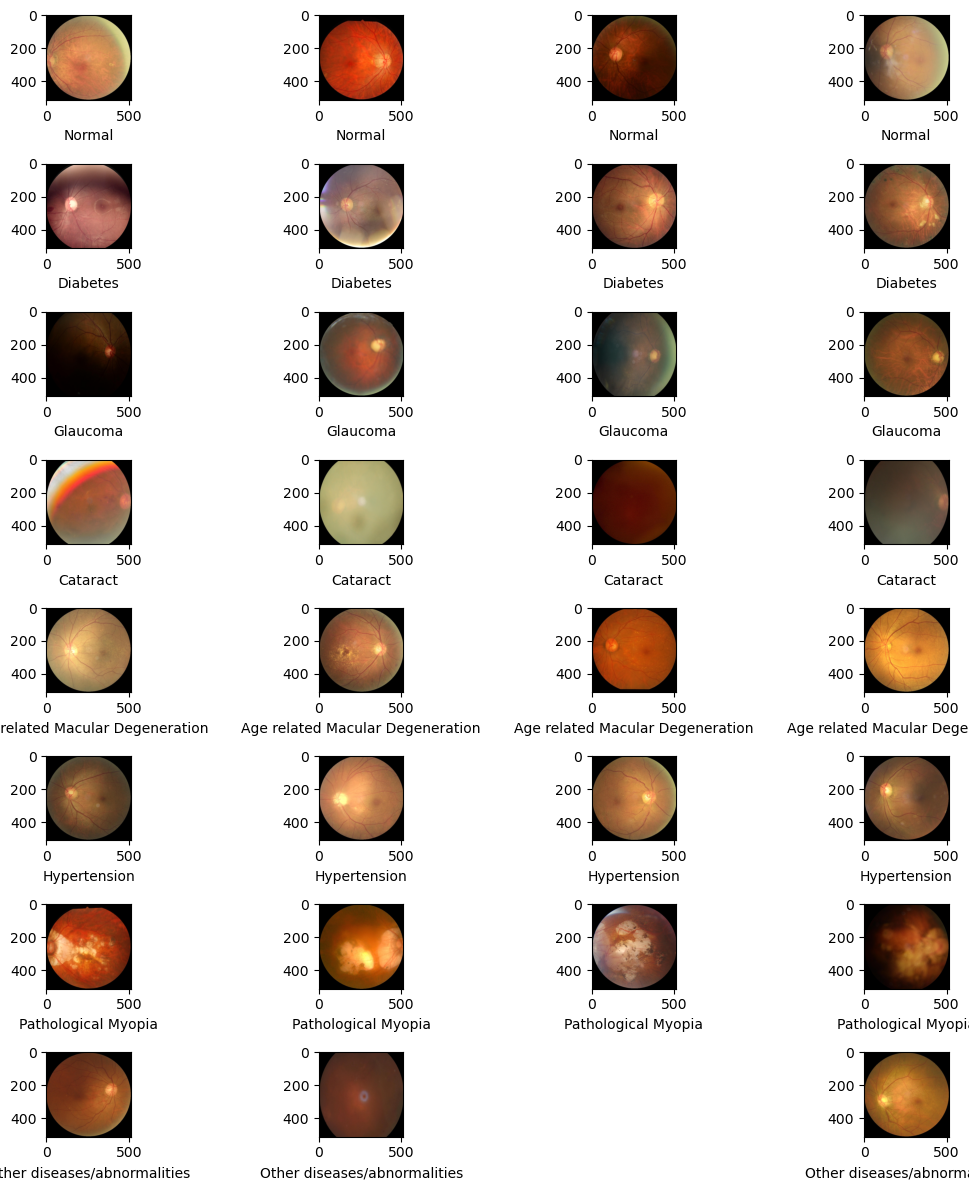

In [66]:
import cv2
import matplotlib.pyplot as plt
import os

# Assuming that the raw_data DataFrame is already defined and the img_dir path is set

plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes.values()):
    
    class_subset = raw_data.loc[raw_data.class_name == class_name].sample(n=4)
    
    img_names = class_subset.filename.to_list()
    
    for j, img in enumerate(img_names):
        image_path = os.path.join(img_dir, img)
        
        if os.path.isfile(image_path): # Check if the image file exists at the specified path
            image = cv2.imread(image_path)
        
            ## convert image to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
            ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
            plt.subplot(8, 4, 4 * i + j + 1)
            plt.imshow(image_rgb, aspect=1)
        
            ## label with filename and diagnosis
            plt.xlabel('{}'.format(class_name))

            plt.tight_layout() 

plt.show()

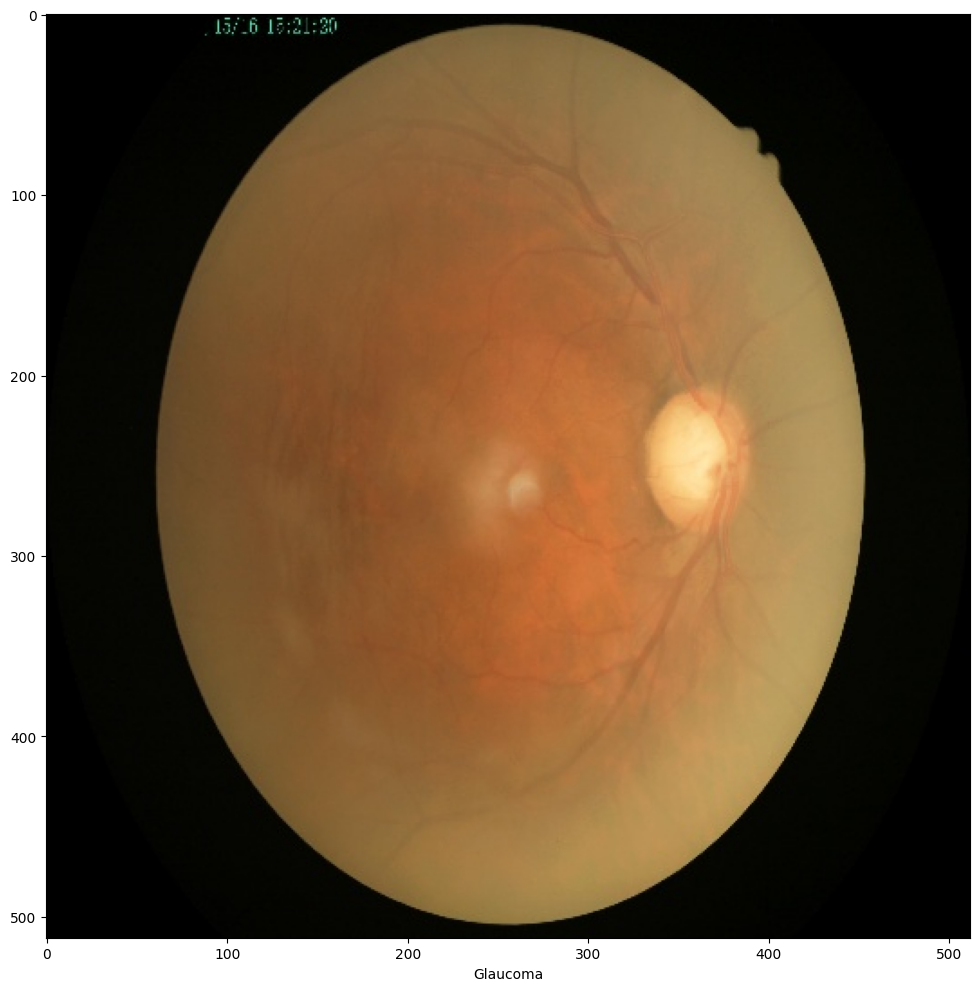

In [56]:
plt.figure(figsize=(12, 12))

single_class = ["Glaucoma"]

for i, class_name in enumerate(single_class):
    
    class_subset = raw_data.loc[raw_data.class_name == class_name].sample(n=4)
    
    img_names = class_subset.filename.to_list()
    
    for j, img in enumerate(img_names):
        image = cv2.imread(os.path.join(img_dir, img))
        
        ## convert image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ## subplot variables - (# of rows, # of columns, iterate through locations on grid)
        # plt.subplot(8, 4, 4 * i + j + 1)
        plt.imshow(image_rgb, aspect=1)
        
        ## label with filename and diagnosis
        plt.xlabel('{}'.format(class_name))


In [67]:
processed_labels = raw_data[["ID", "filename", "class_name", "target"]]
processed_labels.to_csv('./labels_clean.csv', index=False)

processed_labels.head()

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,2_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,4_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,5_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"


#### taking images for displaying image by torch to use them is testing

In [70]:
def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [71]:
def show_images(image):
    """Show image"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

#### making Recognition on images and making scaling and modification

In [72]:
class OcularDiseaseRecognition(Dataset):
    """Ocular Disease Recognition."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with labels.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels_frame.iloc[idx, 1])
        image = io.imread(img_name)
        target = self.labels_frame.iloc[idx, 3]
        target = np.array(json.loads(target))
        sample = {'image': image, 'labels': target}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'labels': label}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]


        return {'image': image, 'labels': label}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['labels']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'labels': torch.from_numpy(label)}

In [73]:
pwd

'C:\\Users\\norah\\Downloads\\data science project'

In [74]:
labels = pd.read_csv('./labels_clean.csv')

n = 65
img_name = labels.iloc[n, 1]
class_name =  labels.iloc[n, 2]
target = labels.iloc[n, 3]

print('Image name: {}'.format(img_name))
print('Class Name: {}'.format(class_name))
print('Target: {}'.format(target))

Image name: 81_right.jpg
Class Name: Diabetes
Target: [0, 1, 0, 0, 0, 0, 0, 0]


In [75]:
labels.head(2)

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [76]:
labels.shape

(6392, 4)

In [77]:
# number of subprocesses to use for data loading
num_workers = 2
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2
test_size = 0.2

#### making training and testing images from reprocessed_images to labels_clean.csv that we transfer image samples to it

In [78]:
# choose the training and test datasets
img_dir = "./preprocessed_images"
labels_dir = './labels_clean.csv'

full_data  = OcularDiseaseRecognition(csv_file=labels_dir, 
                                      root_dir=img_dir, 
                                      transform=transforms.Compose([Rescale(512),
                                                                    ToTensor()])
                                     )

In [79]:
# obtain training indices that will be used for validation
num_train = len(full_data)
indices = list(range(num_train))

np.random.shuffle(indices)

val_split = int(np.floor(valid_size * num_train))
test_split = int(np.floor(valid_size * num_train))


test_idx, valid_idx, train_idx = indices[:test_split], indices[test_split: test_split + val_split], indices[test_split + val_split:]

In [80]:
num_train

6392

In [81]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler  = SubsetRandomSampler(test_idx)

In [82]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(full_data, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)

In [83]:
len(train_loader)

120

In [ ]:
device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

print(device_name)

#### import torch and modify resnet50-0676ba61.pth model to save images

In [92]:
import torch

# Manually download the pre-trained weights and save them to the current directory
torch.hub.download_url_to_file('https://download.pytorch.org/models/resnet50-0676ba61.pth', 'resnet50-0676ba61.pth')

# Load the ResNet-50 model using the downloaded weights
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=False, weights_path='resnet50-0676ba61.pth')

100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:52<00:00, 1.94MB/s]
Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\norah/.cache\torch\hub\v0.10.0.zip


TypeError: ResNet.__init__() got an unexpected keyword argument 'weights_path'

In [ ]:
def save_checkpoint(state, is_best, filename='./bt_resnet50_ckpt_v2.pth.zip'):
    torch.save(state, filename)

In [95]:
# instantiate transfer learning model
resnet_model = models.resnet50(pretrained=True)

# set all parameters as trainable
for param in resnet_model.parameters():
    param.requires_grad = True

# get input of fc layer
n_inputs = resnet_model.fc.in_features

# redefine fc layer / top layer/ head for our classification problem
resnet_model.fc = nn.Sequential(nn.Linear(n_inputs, 2048),
                                nn.ReLU(),
                                nn.Dropout(p=0.4),
                                nn.Linear(2048, 2048),
                                nn.ReLU(),
                                nn.Dropout(p=0.4),
                                nn.Linear(2048, 8),
                                nn.LogSigmoid())

# set all parameters of the model as trainable
for name, child in resnet_model.named_children():
    for name2, params in child.named_parameters():
        params.requires_grad = True


# Disbribute the model to all GPU's
resnet_model = nn.DataParallel(resnet_model)

# set model to run on GPU or CPU absed on availibility
resnet_model.to(device)

# print the trasnfer learning NN model's architecture
resnet_model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\norah/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:40<00:00, 2.53MB/s]


DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [96]:
# Limit maximum memory usage to 1GB

# torch.backends.cuda.reserved_memory = 4 * 1024 * 1024 * 1024
# torch.backends.cuda.max_allocated_memory = 4 * 1024 * 1024 * 1024

#### modify loss functions to know the valid images 
train_losses
test_losses 
train_correct 
test_correct

# loss function
# if GPU is available set loss function to use GPU
criterion = nn.CrossEntropyLoss().to(device)

# optimizer
optimizer = torch.optim.SGD(resnet_model.parameters(), momentum=0.9, lr=3e-4)


# empty lists to store losses and accuracies
train_losses = []
test_losses = []
train_correct = []
test_correct = []

In [98]:
epochs = 32

In [99]:
torch.cuda.empty_cache()

In [100]:
import time
from torch.cuda.amp import GradScaler

In [ ]:
# set training start time
start_time = time.time()

# set best_prec loss value as 2 for checkpoint threshold
best_prec1 = 2
is_best = False

# empty batch variables
b = None
train_b = None
test_b = None

scaler = GradScaler()

for i in range(epochs):
    # empty training correct and test correct counter as 0 during every iteration
    trn_corr = 0
    tst_corr = 0
    trn_loss = 0
    tst_loss = 0
    
    # set epoch's starting time
    e_start = time.time()
    

    # train in batches
    for b, sample in enumerate(train_loader):
        # set label as cuda if device is cuda
        X, y = sample['image'].to(device, dtype=torch.float), sample['labels'].to(device, dtype=torch.float)
        
        # forward pass image sample
        y_pred = resnet_model(X.view(-1, 3, 512, 512))

        # calculate loss
        loss = criterion(y_pred.float(), y.float())

        trn_loss += loss.item()
        # get argmax of predicted tensor, which is our label
        predicted = torch.argmax(y_pred, dim=1).data
        y = torch.argmax(y, dim=1).data

        # if predicted label is correct as true label, calculate the sum for samples

        batch_corr = (predicted == y).sum()
        # increment train correct with correcly predicted labels per batch
        trn_corr += batch_corr.item()
        
        # set optimizer gradients to zero
        optimizer.zero_grad()
        # Backpropagate with autocasting
        # back propagate with loss
        scaler.scale(loss).backward()
        # perform optimizer step
        scaler.step(optimizer)
        scaler.update()
      
    # set epoch's end time
    e_end = time.time()
    
    # print training metrics
    print(f'Epoch {(i+1)} Batch {(b+1)}\nAccuracy: {trn_corr*100/(b*batch_size):2.2f} %  Loss: {trn_loss/len(train_loader):2.4f}  Duration: {((e_end-e_start)/60):.2f} minutes') 
    
    # some metrics storage for visualization
    train_b = b
    train_losses.append(trn_loss)
    train_correct.append(trn_corr)

    X, y = None, None

    # validate using validation generator
    # do not perform any gradient updates while validation
    with torch.no_grad():
        for b, sample in enumerate(valid_loader):
            # set label as cuda if device is cuda
            X, y = sample['image'].to(device, dtype=torch.float), sample['labels'].to(device, dtype=torch.float)

            # forward pass image
            y_val = resnet_model(X.view(-1, 3, 512, 512))

            # get argmax of predicted tensor, which is our label
            predicted = torch.argmax(y_val, dim=1).data
            y = torch.argmax(y, dim=1).data

            # increment test correct with correcly predicted labels per batch
            tst_corr += (predicted == y).sum().item()

            # get loss of validation set
            loss = criterion(y_val.float(), y.long())
            tst_loss += loss.item()
            
            
    # print validation metrics
    print(f'Validation Accuracy {tst_corr*100/(b*batch_size):2.2f}% Validation Loss: {tst_loss/len(valid_loader):2.4f}\n')

    # if current validation loss is less than previous iteration's validatin loss create and save a checkpoint
    is_best = loss < best_prec1
    best_prec1 = min(loss, best_prec1)
    
    if is_best:
        save_checkpoint({
                'epoch': i + 1,
                'state_dict': resnet_model.state_dict(),
                'best_prec1': best_prec1,
            }, is_best)
        
        is_best = False

    # some metrics storage for visualization
    test_b  = b
    test_losses.append(tst_loss)
    test_correct.append(tst_corr)

# set total training's end time
end_time = time.time() - start_time    

# print training summary
print("\nTraining Duration {:.2f} minutes".format(end_time/60))
print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
print("GPU memory cached : {} kb".format(torch.cuda.memory_cached()))

Epoch 1 Batch 120
Accuracy: 42.15 %  Loss: 1.9396  Duration: 5.45 minutes
Validation Accuracy 46.31% Validation Loss: 1.7959

Epoch 2 Batch 120
Accuracy: 45.67 %  Loss: 1.6771  Duration: 5.33 minutes
Validation Accuracy 46.31% Validation Loss: 1.5786

Epoch 3 Batch 120
Accuracy: 45.67 %  Loss: 1.5431  Duration: 5.28 minutes
Validation Accuracy 46.31% Validation Loss: 1.5159


Training Duration 21.08 minutes
GPU memory used : 500634112 kb
GPU memory cached : 9034530816 kb